In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 6.5 MB/s 


# import libraries
import some basic important libraries before working on the machine learning model.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [ ]:
import neattext.functions as nfx

# import data

In [ ]:
df=pd.read_csv('/content/text_emotion.csv')

In [ ]:
df = df.rename(columns={'sentiment': 'emotion'})

In [ ]:
df

,tweet_id,emotion,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


It will show the output like this. It will show the first five and last five rows and also it will show the number of rows and number of columns in the data frame.

In [ ]:
df.head()

,tweet_id,emotion,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


It will give total count, mean, standard deviation, minimum value, maximum value, 25% of data, 50% of data, 75% of data.

In [ ]:
df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [ ]:
df.shape

(40000, 4)

In [ ]:
df.columns

Index(['tweet_id', 'emotion', 'author', 'content'], dtype='object')

nunique() method gives the number of unique values in the particular column

In [ ]:
df['emotion'].nunique()

13

unique() method gives unique values in the particular column.

In [ ]:
print(df['emotion'].unique())

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


value_counts() method gives the number of times the particular value repeated in that column through the data frame.

In [ ]:
df['emotion'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: emotion, dtype: int64

In [ ]:
print('length of data is', len(df))

length of data is 40000


In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:   40000


dtypes gives the datatypes of the particular columns in the data frame.

In [ ]:
df.dtypes

tweet_id     int64
emotion     object
author      object
content     object
dtype: object

In [ ]:
df.isnull().sum()

tweet_id    0
emotion     0
author      0
content     0
dtype: int64

In [ ]:
df['emotion'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: emotion, dtype: int64

## Visualizations

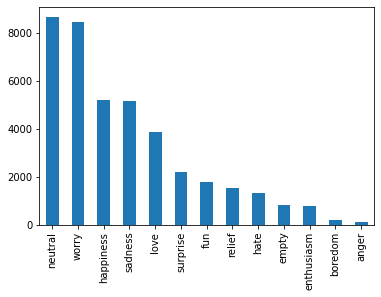

In [ ]:
df['emotion'].value_counts().plot(kind='bar')

In [ ]:
def cleaning_repeating_char(content):
    return re.sub(r'(.)1+', r'1', content)
df['content'] = df['content'].apply(lambda x: cleaning_repeating_char(x))
df['content'].tail()

39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


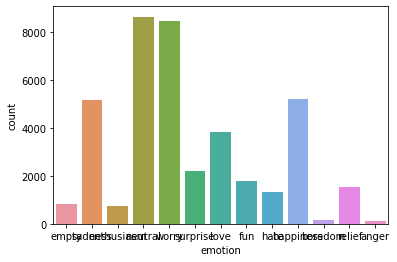

In [ ]:
sns.countplot(df['emotion'])

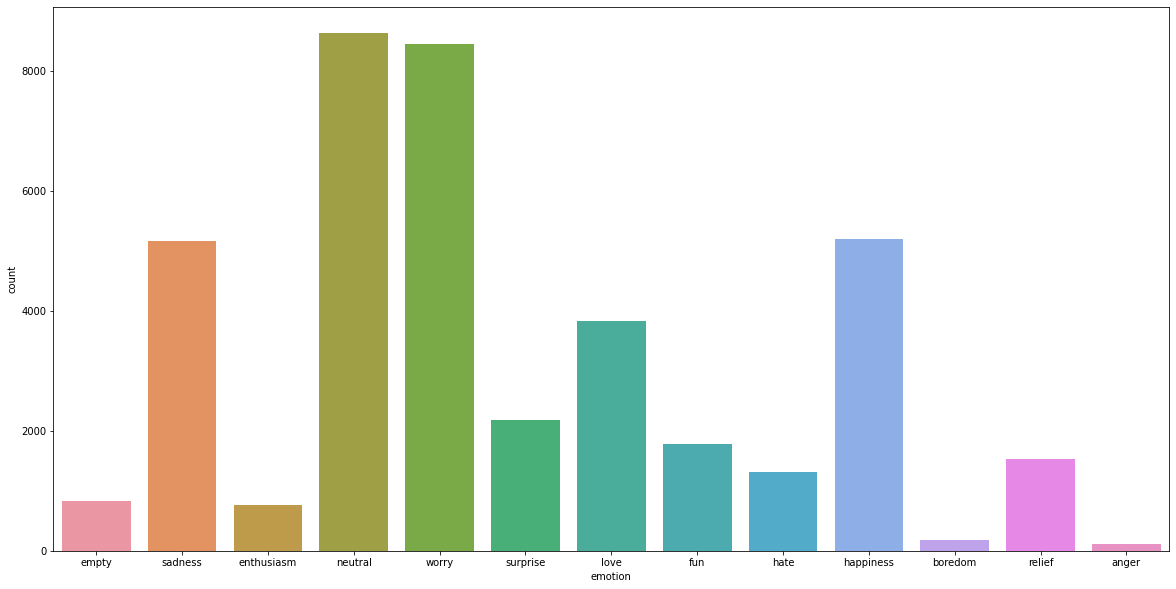

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='emotion',data=df)
plt.show()

### EDA( Exploratory Data Anylysis )


In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = 'postive'
  elif sentiment < 0:
    result = 'Negative'
  else:
    result = 'Neutral'
  return result

In [ ]:
get_sentiment('i love anime')

'postive'

In [ ]:
df['sentiment'] = df['content'].apply(get_sentiment)

In [ ]:
df.head()

,tweet_id,emotion,author,content,sentiment
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,postive
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,Neutral


In [ ]:
#compare emot vs senti
df.groupby(['emotion','sentiment']).size()

emotion     sentiment
anger       Negative       34
            Neutral        41
            postive        35
boredom     Negative       80
            Neutral        56
            postive        43
empty       Negative      168
            Neutral       419
            postive       240
enthusiasm  Negative      100
            Neutral       255
            postive       404
fun         Negative      204
            Neutral       476
            postive      1096
happiness   Negative      345
            Neutral      1228
            postive      3636
hate        Negative      694
            Neutral       365
            postive       264
love        Negative      214
            Neutral       686
            postive      2942
neutral     Negative     1151
            Neutral      4445
            postive      3042
relief      Negative      206
            Neutral       477
            postive       843
sadness     Negative     1886
            Neutral      1697
            postiv

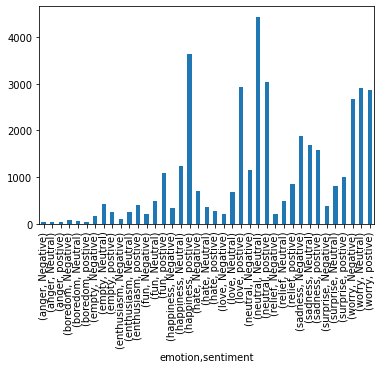

In [ ]:
#first method:matplotlib
#compare emot vs senti
df.groupby(['emotion','sentiment']).size().plot(kind='bar')

In [ ]:
#using seaborn
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f13b88c6950>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


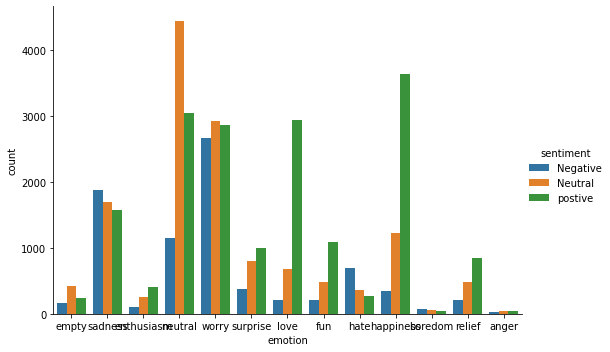

In [ ]:
sns.factorplot(x='emotion',hue='sentiment',data=df,kind='count',size=5,aspect=1.5)

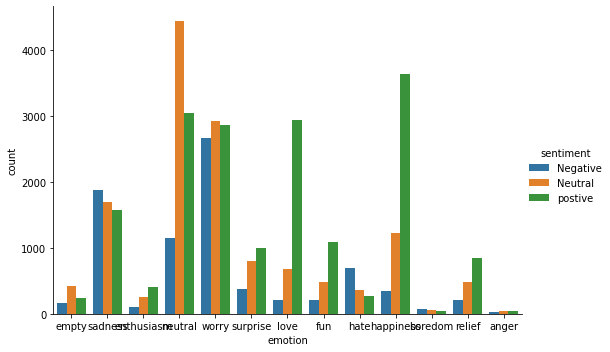

In [ ]:
sns.catplot(x='emotion',hue='sentiment',data=df,kind='count',aspect=1.5)

In [ ]:
#text cleaning
#dir(nfx)

In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(df):
    content = [st.stem(word) for word in df]
    return df
df['content']= df['content'].apply(lambda x: stemming_on_text(x))
df['content'].head()

0    @tiffanylue i know  i was listenin to bad habi...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    @dannycastillo We want to trade with someone w...
Name: content, dtype: object

In [ ]:
# lm = nltk.WordNetLemmatizer()
# def lemmatizer_on_text(df):
#     content = [lm.lemmatize(word) for word in df]
#     return df
# df['content'] = df['content'].apply(lambda x: lemmatizer_on_text(x))
# df['content'].head()

## keyword extraction

In [ ]:
df['Clean_text']=df['content'].apply(nfx.remove_stopwords)

In [ ]:
df['Clean_text']=df['Clean_text'].apply(nfx.remove_userhandles)

In [ ]:
df['Clean_text']=df['Clean_text'].apply(nfx.remove_punctuations)

In [ ]:
df[['content','Clean_text']]

,content,Clean_text
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started frea...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(content,num=50):
  tokens = [ tok for tok in content.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [ ]:
#list of emotions
emotion_list = df['emotion'].unique().tolist()

In [ ]:
emotion_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [ ]:
fun_list = df[df['emotion'] == 'fun']['Clean_text'].tolist()

In [ ]:
fun_docx= ' '.join(fun_list)

In [ ]:
fun_docx

'Wondering Im awake 7amwriting new songplotting evil secret plots muahahahaoh damn itnot secret anymore   lt3 gonna twitter ) cause amazing lol come canada perform RIP leonardo great mini fiddler crab   out memo looks amazing   OMG Ur alive LOL 2day gone sooo slow Im going insane Grrr tonight   california vintage ahahah BEST dresses want dont ebay (    Umm yeah Thats probably pretty good note self eeeeeewwwwwwww   Thats awesome weekend cant Im moving Sat lot fun finished im not color drawing come   Lettuce amp spinach best cool weather live floridanot luck growing those   know enjoy watching twitter entertaining comic miss BFF rocking Hotel California now   songs stay same Whats next Hmmm Careless whisper   dissapointment hhaha creeped ice cream social good times lars real girl sad movie playing street fighter IV Seth Raped clear DVR getting rid tomorrw   hell yeah missed u nite lol u like opinion wish   burning trees trying dresses spent 2 hours playing TF2 think Im better started unn

In [ ]:
#extract keywords
keyword_fun = extract_keywords(fun_docx)

In [ ]:
keyword_fun

{'fun': 128,
 'lol': 123,
 'Im': 119,
 'like': 98,
 'good': 90,
 'day': 84,
 'haha': 83,
 'going': 73,
 'im': 71,
 'u': 71,
 'got': 65,
 'think': 59,
 'amp': 58,
 'night': 57,
 'today': 56,
 'know': 54,
 'it': 53,
 'cant': 51,
 'time': 51,
 'great': 47,
 'tonight': 46,
 'love': 44,
 'want': 43,
 'wait': 43,
 '2': 42,
 'right': 42,
 'tomorrow': 41,
 'new': 40,
 'work': 39,
 'funny': 39,
 'gonna': 38,
 'Ill': 37,
 'LOL': 36,
 'yeah': 35,
 'nice': 35,
 'thats': 34,
 'now': 33,
 'home': 33,
 'look': 33,
 'me': 33,
 'cool': 30,
 'better': 30,
 'week': 30,
 'come': 29,
 'Ive': 29,
 'you': 29,
 'way': 29,
 'sleep': 29,
 'getting': 28,
 'morning': 28}

In [ ]:
#plot
def plot_most_common_words(mydict,emotion_name):
  df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title("Plot of {} Most common keywords".format(emotion_name))
  sns.barplot(x='token',y='count',data=df_01)
  plt.xticks(rotation=45)
  plt.show()

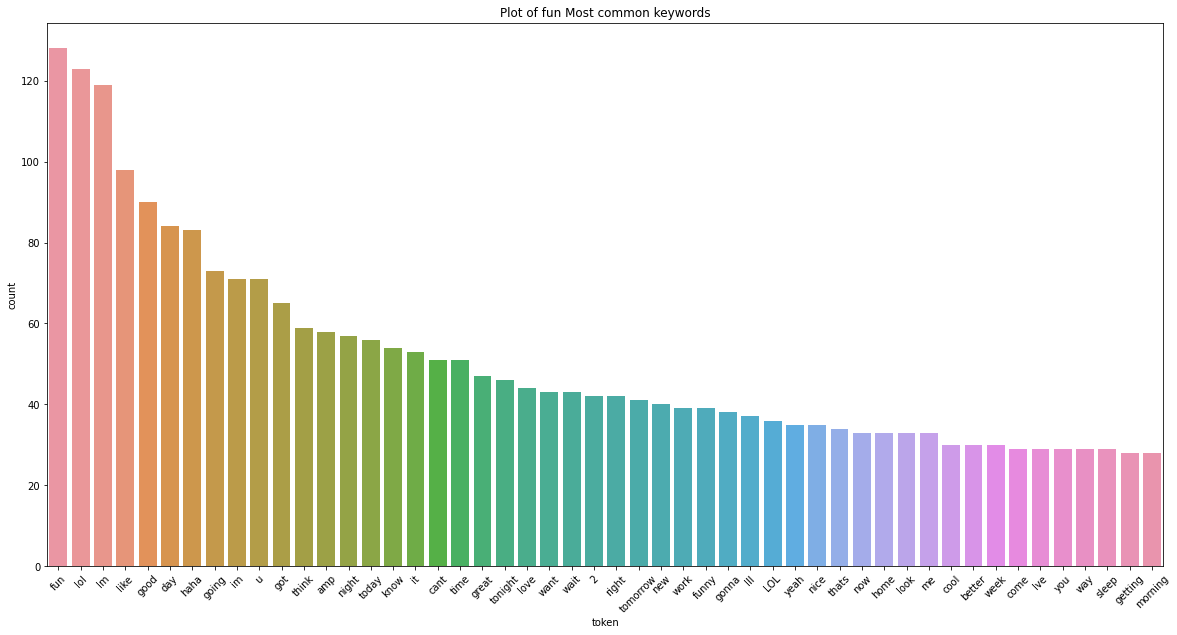

In [ ]:
plot_most_common_words(keyword_fun,"fun")

In [ ]:
surprise_list = df[df['emotion'] == 'surprise']['Clean_text'].to_list()
#doc
surprise_docx = ' '.join(surprise_list)
#extract keywords
keyword_surprise = extract_keywords(surprise_docx)

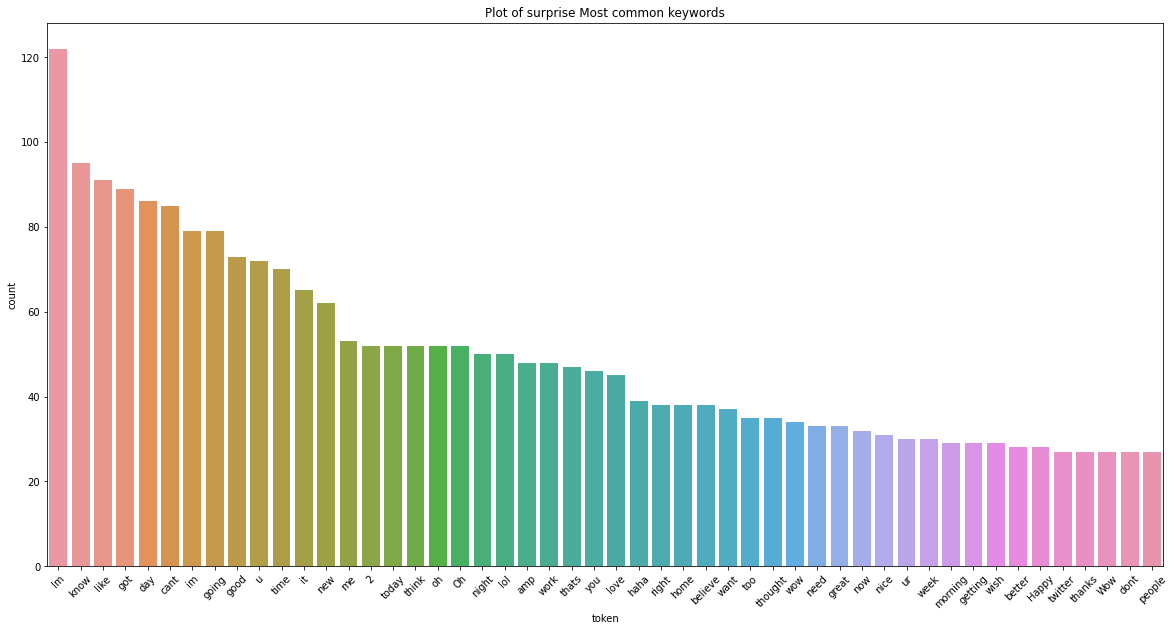

In [ ]:
plot_most_common_words(keyword_surprise,"surprise")

#### word cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('on')
  plt.show()

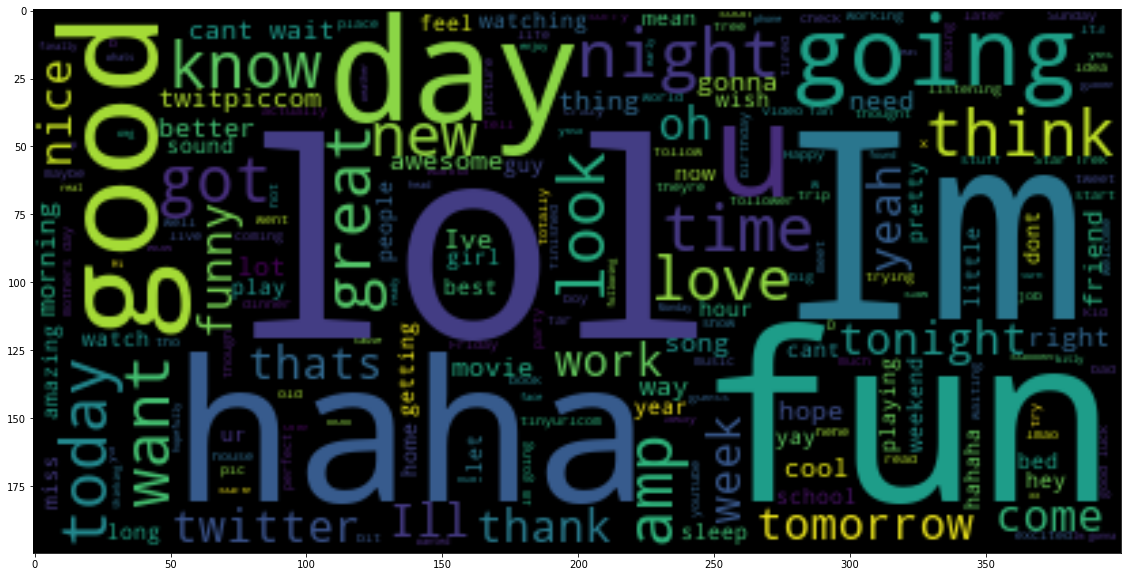

In [ ]:
plot_wordcloud(fun_docx)

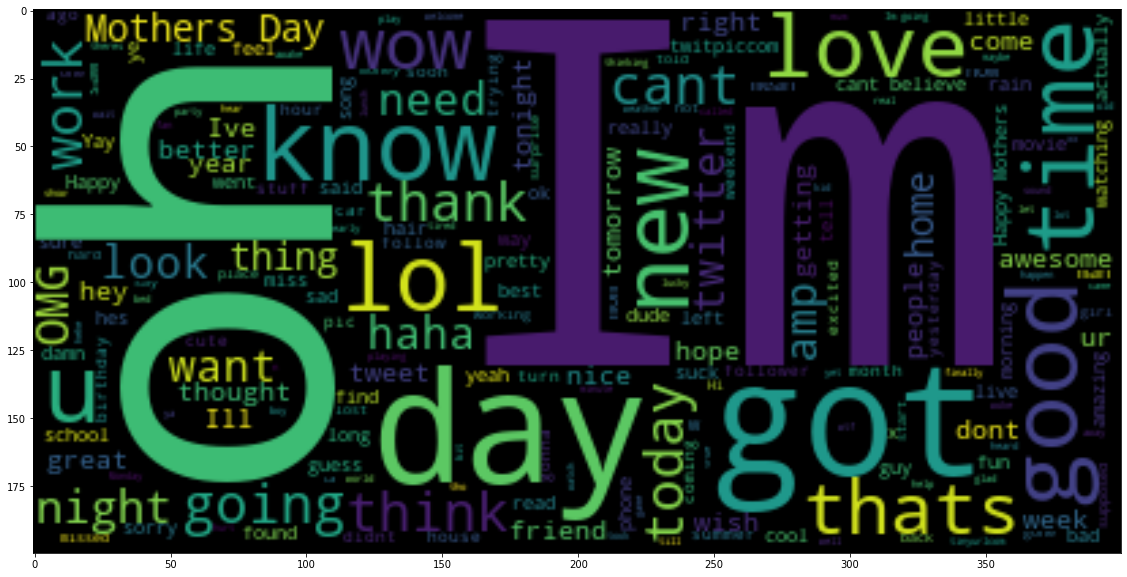

In [ ]:
plot_wordcloud(surprise_docx)

# Machine Learning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
#vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

## split the dataset into traing and tesing set
Import train_test_split from the scikit learn library. And then whole data frame is divided into four data sets. They are, x_train, x_test, y_train, y_test. Bot x and y are divided into training and test datasets.

In [ ]:
#split 
from sklearn.model_selection import train_test_split

In [ ]:
# features
Xfeatures = df['Clean_text']
ylabels = df['emotion']

In [ ]:
Xfeatures

0          know listenin bad habit earlier started frea...
1                   Layin n bed headache ughhhhwaitin call
2                            Funeral ceremonygloomy friday
3                                  wants hang friends SOON
4                          want trade Houston tickets will
                               ...                        
39995                                                     
39996                               Happy Mothers Day love
39997    Happy Mothers Day mommies there woman man long...
39998      WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...
39999      bullet train tokyo gf visiting japan thursda...
Name: Clean_text, Length: 40000, dtype: object

## CountVectorizer

In [ ]:
#vectorizer
cv = CountVectorizer()
X=cv.fit_transform(Xfeatures) 

In [ ]:
# cv.get_feature_names()

In [ ]:
#split dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.25,random_state=42)

In [ ]:
# X.toarray()

## Modelling

In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_predsvm = SVCmodel.predict(X_test)

In [ ]:
SVCmodel.score(X_test,y_test)

0.2929

In [ ]:
y_pred_for_svm = SVCmodel.predict(X_test)

In [ ]:
#classfication
print(classification_report(y_test,y_pred_for_svm))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        27
     boredom       0.00      0.00      0.00        43
       empty       0.01      0.00      0.01       203
  enthusiasm       0.01      0.00      0.01       204
         fun       0.11      0.09      0.10       421
   happiness       0.29      0.28      0.28      1288
        hate       0.23      0.18      0.21       332
        love       0.36      0.37      0.36       941
     neutral       0.34      0.46      0.39      2183
      relief       0.13      0.07      0.09       435
     sadness       0.27      0.25      0.26      1314
    surprise       0.13      0.09      0.11       516
       worry       0.32      0.35      0.33      2093

    accuracy                           0.29     10000
   macro avg       0.17      0.16      0.16     10000
weighted avg       0.27      0.29      0.28     10000



In [ ]:
#model building
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#predictions
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

array(['happiness', 'neutral', 'worry', ..., 'worry', 'worry', 'worry'],
      dtype='<U10')

In [ ]:
y_pred_proba = nv_model.predict_proba(X_test)

In [ ]:
y_pred_proba

array([[3.81593236e-06, 5.52858794e-06, 4.14764258e-04, ...,
        4.58940282e-02, 9.51822255e-03, 1.54734422e-01],
       [8.60803463e-07, 2.65143275e-06, 1.14783332e-04, ...,
        2.76510578e-02, 5.10551390e-03, 2.22181048e-01],
       [1.29914705e-07, 6.89101187e-07, 6.66474216e-06, ...,
        1.02522315e-02, 1.07104274e-03, 6.75209029e-01],
       ...,
       [3.18268118e-10, 6.12745507e-09, 2.02052108e-06, ...,
        6.00355139e-02, 1.04534815e-01, 7.38773360e-01],
       [8.91456334e-08, 6.70776285e-07, 3.31513533e-05, ...,
        3.36938660e-02, 2.09248828e-03, 3.67650064e-01],
       [1.49895087e-03, 2.43446385e-03, 1.04540924e-02, ...,
        1.65409950e-01, 2.35179297e-02, 3.21687049e-01]])

In [ ]:
nv_model.score(X_test,y_test)

0.3153

In [ ]:
y_pred_for_svm

array(['neutral', 'neutral', 'worry', ..., 'worry', 'love', 'neutral'],
      dtype=object)

In [ ]:
nv_model.score(X_test,y_test)

0.3153

In [ ]:
#predictions
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

array(['happiness', 'neutral', 'worry', ..., 'worry', 'worry', 'worry'],
      dtype='<U10')

In [ ]:
#make a single pred
sample_text = ['I love Anime so much']

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
nv_model.predict(vect)

array(['love'], dtype='<U10')

In [ ]:
SVCmodel.predict(vect)

array(['love'], dtype=object)

In [ ]:
#pred probabailty percentage/confidence score
nv_model.predict_proba(vect)

array([[2.14811049e-06, 6.79466243e-06, 4.78401860e-05, 1.24788525e-04,
        1.03916347e-02, 7.38905220e-02, 8.23275897e-04, 6.28225978e-01,
        6.94089185e-02, 8.90333647e-04, 5.34027840e-02, 6.85925193e-03,
        1.55925730e-01]])

In [ ]:
nv_model.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype='<U10')

In [ ]:
np.max(nv_model.predict_proba(vect))

0.6282259779080344

In [ ]:
def predict_emotion(content,model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  pred_proba = model.predict_proba(myvect)
  pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
  print("prediction:{},Prediction score:{}".format(prediction[0],np.max(pred_proba)))
  return pred_percentage_for_all

In [ ]:
a=predict_emotion(sample_text,nv_model)

prediction:love,Prediction score:0.6282259779080344


In [ ]:
predict_emotion(['He loves Anime'],nv_model)

prediction:love,Prediction score:0.6282259779080344


{'anger': 2.1481104925148548e-06,
 'boredom': 6.794662431362889e-06,
 'empty': 4.784018600011661e-05,
 'enthusiasm': 0.00012478852535745543,
 'fun': 0.010391634677226936,
 'happiness': 0.07389052200187132,
 'hate': 0.0008232758965446701,
 'love': 0.6282259779080344,
 'neutral': 0.06940891854033515,
 'relief': 0.0008903336468363886,
 'sadness': 0.05340278398484227,
 'surprise': 0.006859251932141361,
 'worry': 0.15592572992788453}

In [ ]:
predict_emotion(['i hate pravin'],nv_model)

prediction:love,Prediction score:0.6282259779080344


{'anger': 2.1481104925148548e-06,
 'boredom': 6.794662431362889e-06,
 'empty': 4.784018600011661e-05,
 'enthusiasm': 0.00012478852535745543,
 'fun': 0.010391634677226936,
 'happiness': 0.07389052200187132,
 'hate': 0.0008232758965446701,
 'love': 0.6282259779080344,
 'neutral': 0.06940891854033515,
 'relief': 0.0008903336468363886,
 'sadness': 0.05340278398484227,
 'surprise': 0.006859251932141361,
 'worry': 0.15592572992788453}

In [ ]:
#classfication
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        27
     boredom       0.00      0.00      0.00        43
       empty       0.20      0.00      0.01       203
  enthusiasm       0.00      0.00      0.00       204
         fun       0.08      0.00      0.00       421
   happiness       0.31      0.33      0.32      1288
        hate       0.33      0.01      0.02       332
        love       0.47      0.33      0.39       941
     neutral       0.34      0.40      0.37      2183
      relief       0.00      0.00      0.00       435
     sadness       0.31      0.14      0.20      1314
    surprise       0.25      0.02      0.03       516
       worry       0.28      0.64      0.39      2093

    accuracy                           0.32     10000
   macro avg       0.20      0.14      0.13     10000
weighted avg       0.29      0.32      0.27     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_pred_for_nv)

array([[   0,    0,    0,    0,    0,    2,    0,    0,    7,    0,    3,
           0,   15],
       [   0,    0,    0,    0,    0,    1,    0,    1,    8,    0,    3,
           1,   29],
       [   0,    0,    1,    0,    0,   19,    0,    4,   80,    0,   10,
           0,   89],
       [   0,    0,    0,    0,    1,   35,    0,    2,   59,    0,    9,
           0,   98],
       [   0,    0,    0,    0,    1,   95,    1,   19,  109,    0,   17,
           1,  178],
       [   0,    0,    0,    0,    3,  426,    0,  124,  312,    1,   30,
           6,  386],
       [   0,    0,    0,    0,    0,   13,    3,    4,   62,    0,   45,
           2,  203],
       [   0,    0,    0,    0,    0,  214,    0,  311,  153,    0,   35,
           2,  226],
       [   0,    0,    2,    0,    4,  218,    2,   74,  864,    1,   89,
           3,  926],
       [   0,    0,    0,    0,    1,   81,    0,   27,  112,    0,   24,
           0,  190],
       [   0,    0,    1,    0,    1,   58,    0, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


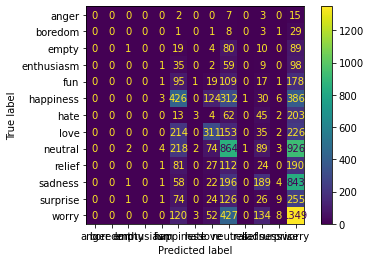

In [ ]:
#plot
plot_confusion_matrix(nv_model,X_test,y_test)

In [ ]:
#logisticreg
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predict_emotion(sample_text,lr_model)

prediction:love,Prediction score:0.4837497839364585


{'anger': 0.00300392248868597,
 'boredom': 0.007609675461112867,
 'empty': 0.007249116960385579,
 'enthusiasm': 0.008770398186088357,
 'fun': 0.07087072384706569,
 'happiness': 0.09144243794935857,
 'hate': 0.020081143813583842,
 'love': 0.4837497839364585,
 'neutral': 0.0962332253269023,
 'relief': 0.016026809054636035,
 'sadness': 0.04741095485815033,
 'surprise': 0.06022185736971897,
 'worry': 0.08732995074785299}

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.1 MB/s 
     |████████████████████████████████| 133 kB 4.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5f23e6678351d33f16fdd255e88bbf6c9ba68283317c8197d91f2701f8d637af
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompat

In [ ]:
import eli5

In [ ]:
#weighs for each class/label
eli5.show_weights(lr_model,top=5)

In [ ]:
class_lnames = ylabels.unique().tolist()

In [ ]:
feature_names = cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
